## Import Neccessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline

## Read in '18/'19 game logs,  '18 bullpen pitching logs, '18 starting pitching logs, and '18 batting stats

In [2]:
gl2018 = pd.read_csv("GL2018.csv")
gl2019 = pd.read_csv("GL2019.csv")
pitching2018 = pd.read_csv("2018reliefpitching.csv")
pitching2018.set_index("Team", inplace = True)
starters2018 = pd.read_csv("2018starters.csv")
starters2018.set_index("Name", inplace = True)
batting2018 = pd.read_csv("2018batting.csv")
batting2018.set_index("Tm", inplace = True)

In [3]:
gl2019.head()

,date,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Starting Pitcher,Home Starting Pitcher
0,20190320,SEA,OAK,9,7,Marco Gonzales,Michael Fiers
1,20190321,SEA,OAK,5,4,Yusei Kikuchi,Marco Estrada
2,20190328,PIT,CIN,3,5,Jameson Taillon,Luis Castillo
3,20190328,ARI,LAN,5,12,Zack Greinke,Hyun-Jin Ryu
4,20190328,COL,MIA,6,3,Kyle Freeland,Jose Urena


In [4]:
pitching2018.head()

,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
Team,,,,,,,,,,,,,,,,,
NYA,35,20,49,508,0,594.2,11.40,3.44,1.01,0.297,74.70%,41.30%,12.20%,3.38,3.33,3.38,8.8
SDN,28,30,36,535,0,635.0,10.20,2.93,0.89,0.298,73.00%,42.30%,10.60%,3.53,3.31,3.57,8.6
HOU,31,23,46,510,0,499.2,10.56,2.47,0.94,0.281,78.80%,42.40%,11.20%,3.03,3.14,3.33,7.6
MIL,42,21,49,559,0,614.0,10.38,3.56,0.98,0.297,76.50%,46.80%,13.60%,3.47,3.57,3.47,6.5
TBA,55,36,52,553,0,824.1,8.23,3.13,0.96,0.278,72.20%,44.50%,10.50%,3.80,3.89,4.17,6.3


In [5]:
starters2018.head()

,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
Name,,,,,,,,,,,,,,,,,,,
Jacob deGrom,Mets,10,9,0,32,32,217.0,11.16,1.91,0.41,0.281,82.0 %,46.4 %,6.3 %,1.70,1.99,2.60,9.0,10954
Max Scherzer,Nationals,18,7,0,33,33,220.2,12.24,2.08,0.94,0.265,81.3 %,34.3 %,9.7 %,2.53,2.65,3.06,7.5,3137
Justin Verlander,Astros,16,9,0,34,34,214.0,12.20,1.56,1.18,0.272,85.3 %,29.1 %,11.1 %,2.52,2.78,3.03,6.6,8700
Chris Sale,Red Sox,12,4,0,27,27,158.0,13.50,1.94,0.63,0.283,82.5 %,44.2 %,9.3 %,2.11,1.98,2.31,6.2,10603
Gerrit Cole,Astros,15,5,0,32,32,200.1,12.40,2.88,0.85,0.286,77.9 %,36.0 %,10.0 %,2.88,2.70,3.04,6.0,13125


In [6]:
batting2018.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
Tm,,,,,,,,,,,,,,,,,,,,,
ARI,49,29.2,4.28,162,6157,5460,693,1283,259,50,...,0.397,0.707,86,2170,110,52,38,45,36,1086
ATL,58,27.3,4.69,162,6251,5582,759,1433,314,29,...,0.417,0.742,98,2330,99,66,49,43,53,1143
BAL,56,28.4,3.84,162,6034,5507,622,1317,242,15,...,0.391,0.689,89,2153,132,57,13,35,19,1027
BOS,44,27.7,5.41,162,6302,5623,876,1509,355,31,...,0.453,0.792,112,2550,130,55,7,48,38,1124
CHN,50,27.2,4.67,163,6369,5624,761,1453,286,34,...,0.410,0.744,97,2308,107,78,40,46,67,1224


## Create a function to create the master data set for all 30 teams

In [7]:
# takes team abbreviation as string, gamelogs for that year, bullpen pitching stats for the prior
# season, and starter pitching stats for the prior season

# returns a dataframe for a team containing each individual game result 
# for that year with runs scored by that team, opposing team starting pitcher,
# and stats for the past season for that starting pitcher and the opposing teams bullpen

def set_lg (team, gl):

  # create data frame of all away games
  away = gl[gl["Visiting Team"] == team].copy() 
  away["Home Field"], away["Runs Scored"] = 0, away["Visiting Team Runs"] 
  away["Opposing Team"], away["Opposing Starter"] = away["Home Team"], away["Home Starting Pitcher"]
  away["Opposing Team Score"] = away["Home Team Runs"] 

  # create data frame for all home games
  home = gl[gl["Home Team"] == team].copy()
  home["Home Field"], home["Runs Scored"] = 1, home["Home Team Runs"]
  home["Opposing Team"], home["Opposing Starter"] = home["Visiting Team"], home["Visiting Starting Pitcher"]
  home["Opposing Team Score"] = home["Visiting Team Runs"]

  # combine the home/away data frame into "season"
  season = pd.concat([away, home], sort = False) 

  season.reset_index(inplace = True)


  # Add the "Won" Column: 1 = Team won, 0 = Lost
  season["Won"] = (season["Runs Scored"] > season["Opposing Team Score"]).astype(int)
  
  # Sort the dataframe by date
  season.sort_values("date", inplace = True)
  # drop unused columns
  season.drop(["Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs", "Visiting Starting Pitcher", "Home Starting Pitcher", "index"], 1, inplace = True)
  # index by opposing team
  season["Index"] = season["Opposing Team"]
  season.set_index("Index", inplace = True)

  # add opposing team bullpen stats for 2017
  season["Opposing Bullpen ERA"] = pitching2018["ERA"]
  season["Opposing Bullpen K/9"] = pitching2018["K/9"]
  season["Opposing Bullpen BB/9"] = pitching2018["BB/9"]
  season["Opposing Bullpen HR/9"] = pitching2018["BABIP"]
  # index by opposing starter
  season["Index2"] = season["Opposing Starter"]
  season.set_index("Index2", inplace = True)
  # add opposing starter stats for 2017
  season["Opposing Starter ERA"] = starters2018["ERA"]
  season["Opposing Starter K/9"] = starters2018["K/9"]
  season["Opposing Starter BB/9"] = starters2018["BB/9"]
  season["Opposing Starter HR/9"] = starters2018["HR/9"]
  season["Opposing Starter BABIP"] = starters2018["BABIP"]
  # fill null values in the starter columns
  print("Unkown Starters: " + str(len(season[season["Opposing Starter ERA"].isna() == True]))+"\n")
  season["Opposing Starter ERA"].fillna(season["Opposing Starter ERA"].mean(), inplace = True)
  season["Opposing Starter K/9"].fillna(season["Opposing Starter K/9"].mean(), inplace = True)
  season["Opposing Starter BB/9"].fillna(season["Opposing Starter BB/9"].mean(), inplace = True)
  season["Opposing Starter HR/9"].fillna(season["Opposing Starter HR/9"].mean(), inplace = True)
  season["Opposing Starter BABIP"].fillna(season["Opposing Starter BABIP"].mean(), inplace = True)

  # add offensive stats  
  season['#Bat'], season['BatAge'], season['R/G'] = batting2018.loc[team]["#Bat"], batting2018.loc[team]['BatAge'], batting2018.loc[team]['R/G']
  season['G'], season['PA'], season['AB'] = batting2018.loc[team]['G'], batting2018.loc[team]['PA'], batting2018.loc[team]['AB']
  season['R'], season['H'], season['2B'] = batting2018.loc[team]['R'], batting2018.loc[team]['H'], batting2018.loc[team]['2B']
  season['3B'], season['HR'], season['RBI'] = batting2018.loc[team]['3B'], batting2018.loc[team]['HR'],batting2018.loc[team]['RBI']
  season['SB'], season['CS'], season['BB'] = batting2018.loc[team]['SB'], batting2018.loc[team]['CS'], batting2018.loc[team]['BB'] 
  season['SO'], season['BA'], season['OBP'] = batting2018.loc[team]['SO'], batting2018.loc[team]['BA'], batting2018.loc[team]['OBP'] 
  season['SLG'], season['OPS'], season['OPS+'] = batting2018.loc[team]['SLG'], batting2018.loc[team]['OPS'], batting2018.loc[team]['OPS+']
  season['TB'], season['GDP'], season['HBP'] = batting2018.loc[team]['TB'],batting2018.loc[team]['GDP'], batting2018.loc[team]['HBP']
  season['SH'], season['SF'], season['IBB'], season['LOB'] = batting2018.loc[team]['SH'], batting2018.loc[team]['SF'], batting2018.loc[team]['IBB'], batting2018.loc[team]['LOB'] 
    
  season.reset_index(inplace = True)
  season.drop("Index2", 1, inplace = True)
  # return the set
  return season

## Create a list of all teams. Use this list to make a dictionary of all 2018 master sets, where the key is the team name

In [8]:
teams = ["NYA", "SDN", "HOU", "MIL", "TBA", "OAK", "SFN", "CHA","TEX", "CHN", "SEA", "PIT", "BOS", 
         "PHI", "COL", "ATL", "BAL", "MIN", "CIN", "DET", "LAN", "ANA", "TOR","WAS", "ARI", "SLN", 
         "CLE", "NYN", "KCA", "MIA"]
# create a 2018 game by game breakdown for each team

# add breakdown to lg_dict2018

# training set
lg_dict2018 = {}
for team in teams:
  lg_dict2018[team] = set_lg(team, gl2018)

Unkown Starters: 11

Unkown Starters: 2

Unkown Starters: 4

Unkown Starters: 2

Unkown Starters: 6

Unkown Starters: 8

Unkown Starters: 2

Unkown Starters: 10

Unkown Starters: 8

Unkown Starters: 1

Unkown Starters: 9

Unkown Starters: 1

Unkown Starters: 9

Unkown Starters: 1

Unkown Starters: 2

Unkown Starters: 6

Unkown Starters: 5

Unkown Starters: 11

Unkown Starters: 4

Unkown Starters: 6

Unkown Starters: 4

Unkown Starters: 7

Unkown Starters: 6

Unkown Starters: 3

Unkown Starters: 2

Unkown Starters: 6

Unkown Starters: 14

Unkown Starters: 3

Unkown Starters: 10

Unkown Starters: 5



## Do the same for 2019

In [9]:
# create a 2019 game by game breakdown for each team

# testing set
lg_dict2019 = {}
for team in teams:
  team2019_lg = set_lg(team, gl2019)
  team2019_lg["Team"] = team
  lg_dict2019[team] = team2019_lg

Unkown Starters: 30

Unkown Starters: 27

Unkown Starters: 38

Unkown Starters: 19

Unkown Starters: 31

Unkown Starters: 29

Unkown Starters: 37

Unkown Starters: 33

Unkown Starters: 36

Unkown Starters: 17

Unkown Starters: 32

Unkown Starters: 17

Unkown Starters: 36

Unkown Starters: 21

Unkown Starters: 26

Unkown Starters: 20

Unkown Starters: 26

Unkown Starters: 21

Unkown Starters: 21

Unkown Starters: 35

Unkown Starters: 34

Unkown Starters: 28

Unkown Starters: 24

Unkown Starters: 19

Unkown Starters: 19

Unkown Starters: 25

Unkown Starters: 34

Unkown Starters: 28

Unkown Starters: 21

Unkown Starters: 20



## Create a training set that is all 2018 season master sets concatentated together. Separate this training set in predictors and two response sets: one for classifiers and one for regressors

In [10]:
# create composite training list of all teams
composite_training = []
for team in teams:
    composite_training.append(lg_dict2018[team])
# concatenate all teams together, separate into predictors/ responses
teams_concat = pd.concat(composite_training)
X_train = teams_concat.drop(["date", 'Opposing Team', 'Opposing Starter', 'Opposing Team Score',
                      'Won','Runs Scored'], 1)

y_train_reg = teams_concat['Runs Scored']
y_train_cl = teams_concat['Won']

teams_concat.to_csv(r'2018master.csv', index = False)

## Do the same for the 2019 season to create the test set

In [11]:
# create composite testing list of all teams
composite_test = []
for team in teams:
    composite_test.append(lg_dict2019[team])
# concatenate all teams together, separate into predictors/ responses
teams_concat_test = pd.concat(composite_test)
X_test = teams_concat_test.drop(["Team", "date", 'Opposing Team', 'Opposing Starter', 'Opposing Team Score',
                      'Won','Runs Scored'], 1)
y_test_reg = teams_concat_test['Runs Scored']
y_test_cl = teams_concat_test["Won"]
teams_concat_test.to_csv(r'2019master.csv', index = False)

# COIN FLIP MODEL

## Implement a model that flips a coin to predict the winner

### Flips is a grandomly generated 0 or 1

In [12]:
np.random.seed(seed = 11)
flips = pd.Series(list(np.random.random_integers(0,1,len(gl2019.index))))
print(flips.mean()*len(gl2019.index))
flips.head()

1215.0


C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


0    1
1    1
2    0
3    1
4    1
dtype: int64

In [13]:
len(gl2019.index)

2429

In [14]:
logs_vs_preds_lg = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds_lg["Home Team Won"] = (logs_vs_preds_lg["Visiting Team Runs"]< 
                                  logs_vs_preds_lg["Home Team Runs"]).astype(int)
logs_vs_preds_lg["Predicted Home Team Won"] = flips 
logs_vs_preds_lg["Predicted Correct Winner"] = (logs_vs_preds_lg["Home Team Won"] == 
                                             logs_vs_preds_lg["Predicted Home Team Won"]).astype(int)
print(logs_vs_preds_lg["Predicted Correct Winner"].mean())
logs_vs_preds_lg.head()
coin_preds = logs_vs_preds_lg

0.5137916838205022


In [15]:
logs_vs_preds_lg["Predicted Correct Winner"].sum()

1248

In [17]:
coin_preds.to_csv(r"coin_logs.csv", index = False)


# LINEAR REGRESSION



 

In [151]:
# create a model using all of the predictors
train_lg = sm.add_constant(X_train) # add a column of ones
est = sm.OLS(y_train_reg, train_lg)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.08e-55
Time:                        18:45:13   Log-Likelihood:                -12359.
No. Observations:                4862   AIC:                         2.479e+04
Df Residuals:                    4824   BIC:                         2.504e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    244

C:\Users\jacob\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Define a function that performs mixed selection

In [25]:
def mixed_selection (lm, curr_preds, potential_preds, tol = .05):
  while (len(potential_preds) > 0):
    index_best = -1 # this will record the index of the best predictor
    curr = -1 # this will record current index
    best_r_squared = lm.rsquared_adj # record the r squared of the current model
    # loop to determine if any of the predictors can better the r-squared  
    for pred in potential_preds:
      curr += 1 # increment current
      preds = curr_preds.copy() # grab the current predictors
      preds.append(pred)
      lm_new = sm.OLS(y, X_mix[preds]).fit() # create a model with the current predictors plus an addional potential predictor
      new_r_sq = lm_new.rsquared_adj # record r squared for new model
      if new_r_sq > best_r_squared:
        best_r_squared = new_r_sq
        index_best = curr
    
    if index_best != -1: # a potential predictor improved the r-squared; remove it from potential_preds and add it to current_preds
      curr_preds.append(potential_preds.pop(index_best))
    else: # none of the remaining potential predictors improved the adjust r-squared; exit loop
      break
    
    # fit a new lm using the new predictors, look at the p-values
    pvals = sm.OLS(y, X_mix[curr_preds]).fit().pvalues
    pval_too_big = []
    # make a list of all the p-values that are greater than the tolerance 
    for feat in pvals.index:
      if(pvals[feat] > tol and feat != 'const'): # if the pvalue is too large, add it to the list of big pvalues
        pval_too_big.append(feat)
  
    # now remove all the features from curr_preds that have a p-value that is too large
    for feat in pval_too_big:
      pop_index = curr_preds.index(feat)
      curr_preds.pop(pop_index)

## Use this function to perform cross validation of models created using mixed selection with differing p-values

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
pvalues = np.arange(0.001,.51,.001)
best_cv_score = 1000
best_pvalue = -1
last_preds = [] 
for pval in pvalues:
  # initialize the arrays of predictors and the null model
  X_mix = X_train.copy()
  y = y_train_reg.copy()
  X_mix['const'] = pd.Series(np.ones(len(X_mix.index)))
  potential_preds = ['Home Field', 'Opposing Bullpen K/9','Opposing Bullpen BB/9', 'Opposing Bullpen HR/9','Opposing Starter K/9', 'Opposing Starter BB/9','R', 'H' , 'RBI', 'SB', 'GDP', 'SH', 'LOB','IBB','SF','TB','OPS+','CS','HBP','OPS','SLG','OBP','BA','SO','BB','HR','3B','2B','AB','R/G','Opposing Bullpen ERA', 'PA','G', '#Bat', 'Opposing Starter ERA', 'Opposing Starter HR/9', 'Opposing Starter BABIP', 'BatAge'] 
  curr_preds = ['const'] # curr preds is just ones for now
  lm = sm.OLS(y, X_mix[curr_preds]).fit()
  # use mixed selection to choose which predictors to keep
  print("Finding features with p-value < "+ str(pval))
  mixed_selection(lm,curr_preds, potential_preds, pval)
  if curr_preds == last_preds: # skip cross validation if the p-value produced the same list of predictors as before
    print("Same features as last Cross Validation. Skipping Cross Validation.")
    continue
  last_preds = curr_preds.copy()
  # using these predictors, 100 fold cross validation 
  sk_preds = curr_preds.copy()
  sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
  lm_sk = LinearRegression() # create sklearn linear regression
  print("Cross validating predictors chosen with p-value: "+str(pval))
  cv = cross_val_score(lm_sk, X_mix[sk_preds], y, cv = len(X_mix.index), scoring = 'neg_mean_squared_error')
  cv_score = cv.mean()*-1
  print("\n|||||||||||||||||||||||||||||||")
  print("CV RMSE Score: " + str(cv_score))
  print("|||||||||||||||||||||||||||||||\n")
  print("Predictors: "+str(curr_preds))
  if cv_score < best_cv_score:
    best_pvalue = pval
    best_cv_score = cv_score
    print("\nNew best CV RMSE: " +str(best_cv_score)+", P-value: = "+str(best_pvalue)+'\n')

Finding features with p-value < 0.001
Cross validating predictors chosen with p-value: 0.001

|||||||||||||||||||||||||||||||
CV RMSE Score: 9.712196343570296
|||||||||||||||||||||||||||||||

Predictors: ['const', 'Opposing Starter ERA']

New best CV RMSE: 9.712196343570296, P-value: = 0.001

Finding features with p-value < 0.002
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.003
Cross validating predictors chosen with p-value: 0.003

|||||||||||||||||||||||||||||||
CV RMSE Score: 9.5310200339305
|||||||||||||||||||||||||||||||

Predictors: ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'OBP']

New best CV RMSE: 9.5310200339305, P-value: = 0.003

Finding features with p-value < 0.004
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.005
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.006
Same features as last Cross Vali

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.069
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07100000000000001
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07200000000000001
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07300000000000001
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.074
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.075
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.076
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.077
Same features 

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.14500000000000002
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.146
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.147
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.148
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.149
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.15
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.151
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.152
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.153
Same features as last Cross Validation. Sk

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.222
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.223
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.224
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.225
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.226
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.227
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.228
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.229
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.23
Same features as last Cross Validation. Skipping Cross V

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.297
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.298
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.299
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.3
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.301
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.302
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.303
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.304
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.305
Same features as last Cross Validation. Skipping Cross Va

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.374
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.375
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.376
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.377
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.378
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.379
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.38
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.381
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.382
Same features as last Cross Validation. Skipping Cross V

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.444
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.445
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.446
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.447
Cross validating predictors chosen with p-value: 0.447

|||||||||||||||||||||||||||||||
CV RMSE Score: 9.516544846756888
|||||||||||||||||||||||||||||||

Predictors: ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'SH', 'Opposing Starter HR/9', 'Opposing Bullpen HR/9', 'Opposing Starter BB/9', 'TB']
Finding features with p-value < 0.448
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.449
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.45
Same fea

best_pvalue_lin = best_pvalue

In [34]:
best_pvalue_lin # 0.048

0.048

## Make some regressions using the sets of predictors with the best CV error and make predictions on the 2019 test data

In [67]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

X_mix = X_train.copy()
y = y_train_reg.copy()
X_mix['const'] = pd.Series(np.ones(len(X_mix.index)))

In [27]:
# p-value < .001
preds = ['const', 'Opposing Starter ERA']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = sm.add_constant(X_train[sk_preds].copy())
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_train[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y_train_reg)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     244.4
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           8.82e-54
Time:                        13:37:38   Log-Likelihood:                -12423.
No. Observations:                4862   AIC:                         2.485e+04
Df Residuals:                    4860   BIC:                         2.486e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0744 

C:\Users\jacob\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [328]:
# p-value < .003
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'OBP']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y_train_reg)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:                    Won   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     79.71
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           2.49e-50
Time:                        23:12:47   Log-Likelihood:                -3412.0
No. Observations:                4862   AIC:                             6832.
Df Residuals:                    4858   BIC:                             6858.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8059 

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     92.45
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.99e-76
Time:                        17:33:50   Log-Likelihood:                -12364.
No. Observations:                4862   AIC:                         2.474e+04
Df Residuals:                    4857   BIC:                         2.477e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.5223 

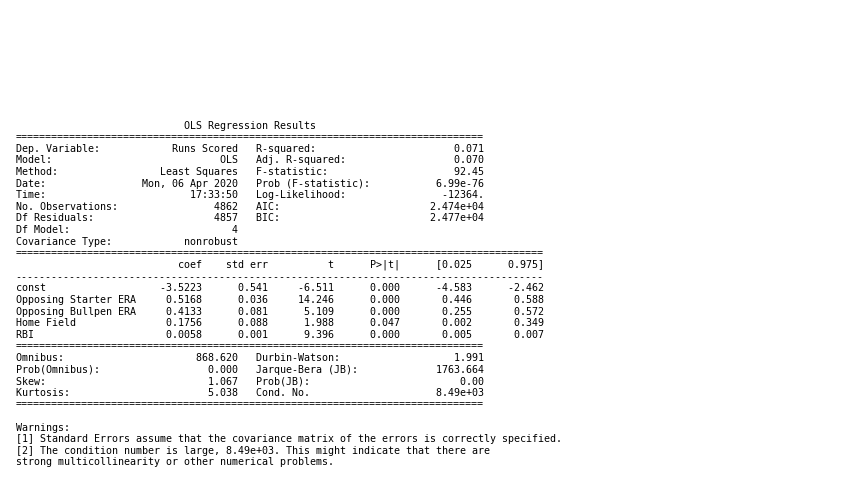

In [68]:
# p-value < .048 BEST LOOCV SCORE
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'RBI']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y_train_reg)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))
lm_preds_star = lm_preds

# save it
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(sm.OLS(y, X_sm).fit().summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('lr_best_cv_summary.png')

In [47]:
# p-value < .234
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'Opposing Starter HR/9', 'RBI']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     74.26
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           3.49e-75
Time:                        14:57:22   Log-Likelihood:                -12364.
No. Observations:                4862   AIC:                         2.474e+04
Df Residuals:                    4856   BIC:                         2.478e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.55

In [49]:
# p-value < .397
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'Opposing Starter HR/9', 'Opposing Bullpen HR/9', 'RBI']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     62.03
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           2.06e-74
Time:                        15:00:01   Log-Likelihood:                -12363.
No. Observations:                4862   AIC:                         2.474e+04
Df Residuals:                    4855   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.55

In [57]:
# p-value < 0.422
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'Opposing Starter HR/9', 'Opposing Bullpen HR/9', 'Opposing Starter BB/9', 'RBI']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     53.28
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           1.13e-73
Time:                        15:06:17   Log-Likelihood:                -12363.
No. Observations:                4862   AIC:                         2.474e+04
Df Residuals:                    4854   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.58

In [55]:
# p-value < 0.44
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'SH', 'Opposing Starter HR/9', 'Opposing Bullpen HR/9', 'Opposing Starter BB/9', 'R/G']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     46.97
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           2.33e-73
Time:                        15:04:09   Log-Likelihood:                -12361.
No. Observations:                4862   AIC:                         2.474e+04
Df Residuals:                    4853   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.94

In [56]:
# p-value < 0.447
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'SH', 'Opposing Starter HR/9', 'Opposing Bullpen HR/9', 'Opposing Starter BB/9', 'TB']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.OLS(y, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LinearRegression()
lm.fit(X_sk, y)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_test_reg, lm_preds)))

                            OLS Regression Results                            
Dep. Variable:            Runs Scored   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     45.50
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           5.05e-71
Time:                        15:04:52   Log-Likelihood:                -12367.
No. Observations:                4862   AIC:                         2.475e+04
Df Residuals:                    4853   BIC:                         2.481e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.47

## Examine predictions made on 2019 Data using the model with the best CV score

### Distplot of residuals, means of residuals

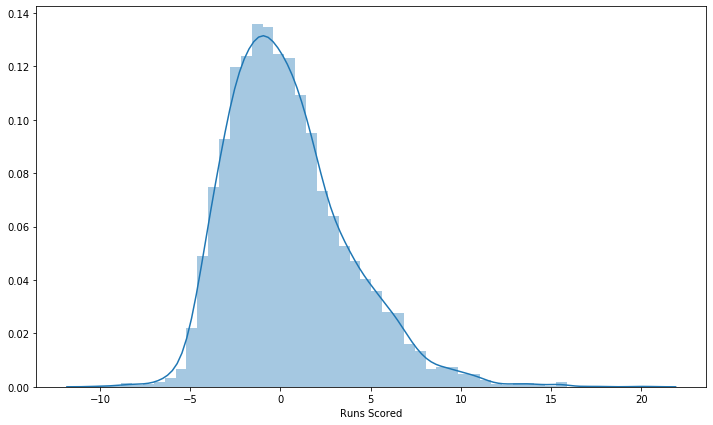

In [69]:
preds_lg = lm_preds_star
sns.distplot(y_test_reg - preds_lg)
plt.savefig("lm_residualplot.png")

In [70]:
(y_test_reg - preds_lg).mean()

0.40684537783506

## Analysis of Predictions; how many games did the model predict the correct winner in?

### Logs vs preds is a dataframe that contains actual results of 2019 games compared the predictions

In [18]:
# the method will usethe teams abbreviation to grab predictions for that team from the 
# dictionary preds_2019. It will then assign a score to the given game using date and opposing 
# pitcher, to differentiate between games/ doubleheaders
def get_preds (game):
    team = game[3]
    date = game[0]
    opposing_team = game[1]
    pitcher = game[2]
    # grab the predictions for the team
    team_preds = date_team_pitch_pred[date_team_pitch_pred['Team'] == team]
    # return predicted runs for the game in question
    game0 = team_preds[team_preds["date"] == date]
    game0 = game0[game0["Opposing Starter"] == pitcher]
    return game0.reset_index().loc[0][5]

In [ ]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = preds_lg

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
lm_logsvpreds = logs_vs_preds

In [73]:
lm_logsvpreds.to_csv(r'lm_logs.csv', index = False)

In [50]:
def compare_preds_reg(predictions):

  logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
  logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
  logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
  logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)
  print("Retrieving Visiting team predicted runs...")
  logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds(date_team_pitch_pred), 1)
  print("Retrieving Home team predicted runs...")
  logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)
  
  print("Evaluating preidtions...")
  logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                              logs_vs_preds["Home Team Predicted Runs"]).astype(int)
  logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
  print("Done.")
  return (logs_vs_preds)

In [38]:
logs_vs_preds.head(20)

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,Predicted Home Team Won,Predicted Correct Winner
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,3.800213,4.821882,0,1,0
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,4.549488,4.981980,0,1,0
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,4.297899,3.859517,1,0,0
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,2.879216,4.202349,1,1,1
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,5.113562,3.273656,0,0,1
5,20190328,Jhoulys Chacin,Miles Mikolas,SLN,MIL,4,5,3.958256,4.081803,1,1,1
6,20190328,Aaron Nola,Julio Teheran,ATL,PHI,4,10,3.625032,4.221418,1,1,1
7,20190328,Eric Lauer,Madison Bumgarner,SFN,SDN,0,2,3.528743,3.312054,1,0,0
8,20190328,Max Scherzer,Jacob deGrom,NYN,WAS,2,0,3.252407,3.889453,0,1,0
9,20190328,Brad Keller,Carlos Rodon,CHA,KCA,3,5,3.887337,4.211248,1,1,1


In [74]:
logs_vs_preds['Predicted Correct Winner'].mean()

0.5829559489501852

In [75]:
logs_vs_preds['Predicted Correct Winner'].sum()

1416

# LOGISTIC REGRESSION

In [85]:
# fit an initial model using all 38 predictors
logm = sm.Logit(y_train_cl, X_train).fit(maxiter = 1000)
print(logm.summary())

Optimization terminated successfully.
         Current function value: 0.659283
         Iterations 204
                           Logit Regression Results                           
Dep. Variable:                    Won   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4825
Method:                           MLE   Df Model:                           36
Date:                Fri, 27 Mar 2020   Pseudo R-squ.:                 0.04886
Time:                        15:22:12   Log-Likelihood:                -3205.4
converged:                       True   LL-Null:                       -3370.1
Covariance Type:            nonrobust   LLR p-value:                 4.698e-49
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Home Field                 0.2483      0.059      4.179      0.000       0.132    

# Retool Mixed Selection for Logisitic Regression
### Instead of using R-squared (adjusted), used Psuedo-Rsquared

In [90]:
def mixed_selection (lm, curr_preds, potential_preds, tol = .05):
  while (len(potential_preds) > 0):
    index_best = -1 # this will record the index of the best predictor
    curr = -1 # this will record current index
    best_r_squared = lm.prsquared # record the r squared of the current model
    # loop to determine if any of the predictors can better the r-squared  
    for pred in potential_preds:
      curr += 1 # increment current
      preds = curr_preds.copy() # grab the current predictors
      preds.append(pred)
      lm_new = sm.Logit(y_train_cl, X_mix[preds]).fit(disp = 0) # create a model with the current predictors plus an addional potential predictor
      new_r_sq = lm_new.prsquared # record psuedo r squared for new model
      if new_r_sq > best_r_squared:
        best_r_squared = new_r_sq
        index_best = curr
    
    if index_best != -1: # a potential predictor improved the r-squared; remove it from potential_preds and add it to current_preds
      curr_preds.append(potential_preds.pop(index_best))
    else: # none of the remaining potential predictors improved the adjust r-squared; exit loop
      break
    
    # fit a new lm using the new predictors, look at the p-values
    pvals = sm.Logit(y_train_cl, X_mix[curr_preds]).fit(disp = 0).pvalues
    pval_too_big = []
    # make a list of all the p-values that are greater than the tolerance 
    for feat in pvals.index:
      if(pvals[feat] > tol and feat != 'const'): # if the pvalue is too large, add it to the list of big pvalues
        pval_too_big.append(feat)
  
    # now remove all the features from curr_preds that have a p-value that is too large
    for feat in pval_too_big:
      pop_index = curr_preds.index(feat)
      curr_preds.pop(pop_index)

In [97]:
from sklearn.linear_model import LogisticRegression
pvalues = np.arange(0.001,.201,.001)
best_cv_score = 0
best_pvalue = -1
last_preds = [] 
for pval in pvalues:
  # initialize the arrays of predictors and the null model
  X_mix = X_train.copy()
  X_mix['const'] = pd.Series(np.ones(len(X_mix.index)))
  potential_preds = ['Home Field', 'Opposing Bullpen K/9','Opposing Bullpen BB/9', 'Opposing Bullpen HR/9','Opposing Starter K/9', 'Opposing Starter BB/9','R', 'H' , 'RBI', 'SB', 'GDP', 'SH', 'LOB','IBB','SF','TB','OPS+','CS','HBP','OPS','SLG','OBP','BA','SO','BB','HR','3B','2B','AB','R/G','Opposing Bullpen ERA', 'PA','G', '#Bat', 'Opposing Starter ERA', 'Opposing Starter HR/9', 'Opposing Starter BABIP', 'BatAge'] 
  curr_preds = ['const'] # curr preds is just ones for now
  lm = sm.Logit(y_train_cl, X_mix[curr_preds]).fit(disp = 0)
  # use mixed selection to choose which predictors to keep
  print("Finding features with p-value < "+ str(pval))
  mixed_selection(lm,curr_preds, potential_preds, pval)
  if curr_preds == last_preds: # skip cross validation if the p-value produced the same list of predictors as before
    print("Same features as last Cross Validation. Skipping Cross Validation.")
    continue
  last_preds = curr_preds.copy()
  # using these predictors, 100 fold cross validation 
  sk_preds = curr_preds.copy()
  sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
  lm_sk = LogisticRegression(max_iter = 20000, solver = 'liblinear') # create sklearn logisitic regression
  print("Cross validating predictors chosen with p-value: "+str(pval))
  cv = cross_val_score(lm_sk, X_mix[sk_preds], y_train_cl, cv = int(len(X_mix.index)/2), scoring = 'accuracy')
  # had to use half the number of cross validations as number of observations, because sk learn won't split more that 
  # min(number(0), number(1))
  cv_score = cv.mean()
  print("\n|||||||||||||||||||||||||||||||")
  print("CV Accuracy Score: " + str(cv_score))
  print("|||||||||||||||||||||||||||||||\n")
  print("Predictors: "+str(curr_preds))
  if cv_score > best_cv_score:
    best_pvalue = pval
    best_cv_score = cv_score
    print("\nNew best CV Accuracy: " +str(best_cv_score)+", P-value: = "+str(best_pvalue)+'\n')

Finding features with p-value < 0.001
Cross validating predictors chosen with p-value: 0.001

|||||||||||||||||||||||||||||||
CV Accuracy Score: 0.5810366104483752
|||||||||||||||||||||||||||||||

Predictors: ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field']

New best CV Accuracy: 0.5810366104483752, P-value: = 0.001

Finding features with p-value < 0.002
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.003
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.004
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.005
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.006
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.007
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-valu

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.064
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.065
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.066
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.067
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.068
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.069
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07100000000000001
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.07200000000000001
Same features as last Cross 

Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.137
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.138
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.139
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.14
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-value < 0.14100000000000001
Cross validating predictors chosen with p-value: 0.14100000000000001

|||||||||||||||||||||||||||||||
CV Accuracy Score: 0.5904977375565611
|||||||||||||||||||||||||||||||

Predictors: ['const', 'Opposing Starter ERA', 'Home Field', 'IBB', 'GDP', 'Opposing Bullpen K/9', 'Opposing Bullpen HR/9', '3B', 'BatAge', 'RBI']
Finding features with p-value < 0.14200000000000002
Same features as last Cross Validation. Skipping Cross Validation.
Finding features with p-

In [107]:
best_pvalue

0.041

In [337]:
int(len(X_train.index)/2)

2431

 ## Look at some of the models chosen by mixed selection

In [37]:
y = y_train_cl

In [15]:
from sklearn.linear_model import LogisticRegression
# p-value < .041, CV best
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'SF', 'TB']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.Logit(y_train_cl, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LogisticRegression()
lm.fit(X_sk, y_train_cl)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nAccuracy: ", metrics.accuracy_score(y_test_cl, lm_preds))
lm_preds_star = lm.predict_proba(X_test[sk_preds])


Optimization terminated successfully.
         Current function value: 0.666535
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    Won   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4856
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Apr 2020   Pseudo R-squ.:                 0.03839
Time:                        22:49:01   Log-Likelihood:                -3240.7
converged:                       True   LL-Null:                       -3370.1
Covariance Type:            nonrobust   LLR p-value:                 7.193e-54
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.6629      0.548    -12.162      0.000      -7.737      -5.589

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
# p-value < .054, over fit
from sklearn.linear_model import LogisticRegression
preds = ['const', 'Opposing Starter ERA', 'Home Field', 'SF', 'Opposing Bullpen K/9', 'Opposing Bullpen HR/9', 'PA']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.Logit(y_train_cl, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LogisticRegression()
lm.fit(X_sk, y_train_cl)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nAccuracy: ", metrics.accuracy_score(y_test_cl, lm_preds))

Optimization terminated successfully.
         Current function value: 0.665854
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    Won   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4855
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                 0.03938
Time:                        14:31:48   Log-Likelihood:                -3237.4
converged:                       True   LL-Null:                       -3370.1
Covariance Type:            nonrobust   LLR p-value:                 2.089e-54
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -15.3816      2.132     -7.214      0.000     -19.560     -11.

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
# p-value < .015 
preds = ['const', 'Opposing Starter ERA', 'Opposing Bullpen ERA', 'Home Field', 'SF']
sk_preds = preds.copy()
sk_preds.pop(0) # get rid of the constant, sk learn adds it automatically
X_sm = X_mix[preds]
print(sm.Logit(y_train_cl, X_sm).fit().summary())
# fit sklearn model and make predictions
X_sk = X_mix[sk_preds]
lm = LogisticRegression()
lm.fit(X_sk, y_train_cl)
X_mix_test = X_test[sk_preds]
lm_preds = lm.predict(X_mix_test)
print("\nAccuracy: ", metrics.accuracy_score(y_test_cl, lm_preds))

Optimization terminated successfully.
         Current function value: 0.670355
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    Won   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4857
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                 0.03288
Time:                        15:31:15   Log-Likelihood:                -3259.3
converged:                       True   LL-Null:                       -3370.1
Covariance Type:            nonrobust   LLR p-value:                 8.373e-47
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9396      0.306    -12.886      0.000      -4.539      -3.340

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluate the predictions of the model with the best accuracy

In [16]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Win Probability'] = lm_preds_star[:,1] # the probabilty at 0 is the P(Y=0)

logs_vs_preds_lg = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds_lg["Visiting Team Win Probability"] = pd.Series()
logs_vs_preds_lg["Home Team Win Probability"] = pd.Series()
logs_vs_preds_lg["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Win Probability"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Win Probability"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Win Probability"]< 
                                  logs_vs_preds["Home Team Win Probability"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
glm_logsvpreds = logs_vs_preds

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
glm_logsvpreds.to_csv(r'glm_logs.csv', index = False)

In [157]:
logs_vs_preds.head(20)

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,Predicted Home Team Won,Predicted Correct Winner,Visiting Team Win Probability,Home Team Win Probability
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,4.473316,4.980695,0,1,0,0.419379,0.555401
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,4.961935,4.830911,0,1,0,0.494214,0.571282
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,4.725379,4.444295,1,0,0,0.533993,0.430192
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,3.231993,4.301852,1,1,1,0.338343,0.474361
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,4.217885,3.463254,0,0,1,0.559290,0.373234
5,20190328,Jhoulys Chacin,Miles Mikolas,SLN,MIL,4,5,3.738217,3.861156,1,1,1,0.430190,0.498869
6,20190328,Aaron Nola,Julio Teheran,ATL,PHI,4,10,4.022707,2.881723,1,1,1,0.411751,0.439094
7,20190328,Eric Lauer,Madison Bumgarner,SFN,SDN,0,2,4.654360,3.077983,1,0,0,0.397045,0.392736
8,20190328,Max Scherzer,Jacob deGrom,NYN,WAS,2,0,3.440781,4.105553,0,1,0,0.361092,0.465294
9,20190328,Brad Keller,Carlos Rodon,CHA,KCA,3,5,3.463225,3.594447,1,1,1,0.419732,0.526941


In [43]:
logs_vs_preds["Predicted Correct Winner"].mean()

0.5788390284067517

In [159]:
logs_vs_preds["Predicted Correct Winner"].sum()

1406

## Tree Methods

### Fit an initial tree, allowed to grow without restriction

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(X_train, y_train_reg)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Visualize this tree

In [106]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz 
import pydot

features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(dtr1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

export_graphviz(dtr1, feature_names = features, filled = True, rounded = True, out_file="graph_1.dot")

## Make predictions on Data using the Overfit tree

In [20]:
dtr_preds = dtr1.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test_reg, dtr_preds))

4.443960340412465

In [105]:
(y_test_reg - dtr_preds).mean()

0.3641930835734879

In [21]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = dtr_preds

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
dtr_logsvpreds = logs_vs_preds

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
dtr_logsvpreds.to_csv(r'dtr1_logs.csv', index = False)

In [22]:
dtr_logsvpreds["Predicted Correct Winner"].sum()

1274

In [23]:
dtr_logsvpreds["Predicted Correct Winner"].mean()

0.5244956772334294

## Create a Random Forest of Overfit Trees

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(n_estimators=1000) # 1000 trees
rfr2.fit(X_train, y_train_reg)
rfr2_preds = rfr2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test_reg, rfr2_preds))

3.5782554877560795

## Analyze the residuals for the random forest

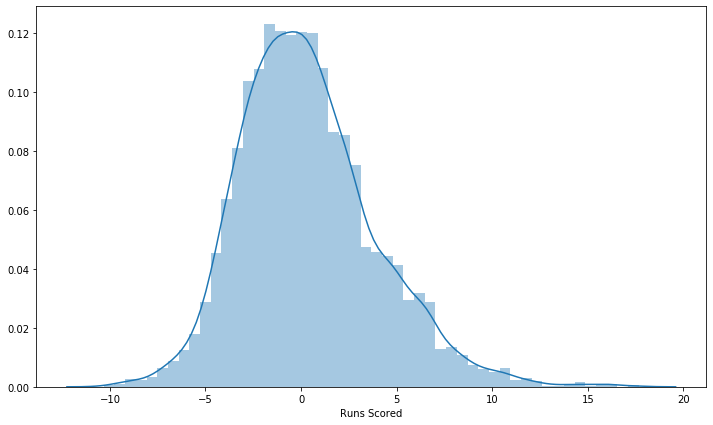

In [164]:
sns.distplot(y_test_reg - rfr2_preds)

In [165]:
(y_test_reg - rfr2_preds).mean()

0.34734676500938366

## Evaluate the Random Forest

In [26]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = rfr2_preds

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
rfr_logsvpreds = logs_vs_preds

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
logs_vs_preds.head()

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Win Probability,Home Team Win Probability,Home Team Won,Predicted Home Team Won,Predicted Correct Winner,Predicted Same Winner,Good Prediction
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,0.501111,0.506395,0,1,0,0,0
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,0.544356,0.506358,0,0,1,0,1
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,0.489007,0.476159,1,0,0,0,0
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,0.366174,0.594549,1,1,1,0,1
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,0.593737,0.557585,0,0,1,0,1


In [56]:
rfr_logsvpreds.to_csv(r'rfr_logs.csv', index = False)

In [167]:
logs_vs_preds['Predicted Correct Winner'].sum()

1323

In [168]:
logs_vs_preds['Predicted Correct Winner'].mean()

0.5446685878962536

## Create the tree with parameters from the nested CV

In [188]:
dtr2 = DecisionTreeRegressor(max_depth = 3, max_features = 31)
dtr2.fit(X_train, y_train_reg)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=31,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [192]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz 
import pydot

features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(dtr2, out_file=dot_data,feature_names=features,filled=True,rounded=True)


graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


export_graphviz(dtr2, feature_names = features, filled = True, rounded = True, out_file="graph_2.dot")
# cmd line to pdf: dot -Tpdf graph.dot -o graph1.pdf


## Evalaute the tree

In [193]:
dtr2_preds = dtr2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test_reg, dtr2_preds))

3.3637725469237187

In [194]:
(y_test_reg - dtr2_preds).mean()

0.44746198094687883

In [195]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = dtr2_preds

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
DTR2_logsvpreds = logs_vs_preds

In [196]:
logs_vs_preds.head()

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,Predicted Home Team Won,Predicted Correct Winner
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,4.590909,4.590909,0,0,1
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,4.725124,4.590909,0,0,1
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,4.590909,3.790576,1,0,0
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,3.116832,3.790576,1,1,1
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,4.590909,3.116832,0,0,1


In [197]:
DTR2_logsvpreds.to_csv(r'dtr2_logs.csv', index = False)

In [198]:
logs_vs_preds['Predicted Correct Winner'].sum()

1337

In [199]:
logs_vs_preds['Predicted Correct Winner'].mean()

0.5504322766570605

# SVM

### PCA for SVM

In [379]:
# want to do it on the scaled data set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(X_scaled)
pca_dict = {}
for i in range(len(pca.components_[0])):
  pca_dict["PC"+str(i+1)+": "+str(round(pca.explained_variance_[i],2))+"% Var"]=pca.components_[i]
pd.DataFrame(pca_dict, index = X_train.columns).to_csv(r"pc_loadings.csv")
# transform the test data from the feature space to the pca space
X_test_scaled = scaler.transform(X_test)
pca_test_data = pca.fit_transform(X_test_scaled)

In [16]:
from sklearn.svm import SVC
svm1 = SVC(90,'sigmoid', probability = True)
svm1.fit(pca_data[:,:8], y_train_cl)


svm1_preds = svm1.predict_proba(pca_test_data[:,:8])

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Fit an SVM by the parameters suggested by the CV loop

In [20]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Win Probability'] = svm1_preds[:,1] # the probabilty at 0 is the P(Y=0)

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Win Probability"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Win Probability"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Win Probability"]< 
                                  logs_vs_preds["Home Team Win Probability"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
logs_vs_preds["Predicted Same Winner"] = (logs_vs_preds["Visiting Team Win Probability"] 
 == logs_vs_preds["Home Team Win Probability"]).astype(int)
SVM1_preds = logs_vs_preds

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
logs_vs_preds["Predicted Correct Winner"].mean()

0.5113215314944421

In [ ]:
SVM1_preds.to_csv(r'SVM_logs.csv', index = False)

In [23]:
logs_vs_preds["Predicted Same Winner"].sum()

28

In [24]:
SVM1_preds[(SVM1_preds["Predicted Same Winner"]==0) & (SVM1_preds["Predicted Correct Winner"]==1)]["Predicted Correct Winner"].sum()

1227

In [25]:
SVM1_preds[(SVM1_preds["Predicted Same Winner"]==0) & (SVM1_preds["Predicted Correct Winner"]==1)]["Predicted Correct Winner"].sum()/2429

0.5051461506792919

## Terrible Error. Try CV with a tiny cost

In [28]:
svm2 = SVC(.01,'sigmoid', probability = True)
svm2.fit(pca_data[:,:6], y_train_cl)

C:\Users\jacob\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
svm2_preds = svm2.predict_proba(pca_test_data[:,:6])

In [31]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Win Probability'] = svm2_preds[:,1] # the probabilty at 0 is the P(Y=0)

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Win Probability"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Win Probability"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Win Probability"]< 
                                  logs_vs_preds["Home Team Win Probability"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
logs_vs_preds["Predicted Same Winner"] = (logs_vs_preds["Visiting Team Win Probability"] 
 == logs_vs_preds["Home Team Win Probability"]).astype(int)

logs_vs_preds["Good Prediction"] = ((logs_vs_preds["Predicted Correct Winner"] == 1) 
                                       & (logs_vs_preds["Predicted Same Winner"] == 0)).astype(int)
SVM2_logsvpreds = logs_vs_preds

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
SVM2_logsvpreds.to_csv(r'svm2_logs.csv', index = False)

In [33]:
logs_vs_preds[logs_vs_preds["Predicted Same Winner"] == 1]

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Win Probability,Home Team Win Probability,Home Team Won,Predicted Home Team Won,Predicted Correct Winner,Predicted Same Winner,Good Prediction
182,20190411,Jose Quintana,Joe Musgrove,PIT,CHN,0,2,0.5,0.5,1,0,0,1,0
705,20190521,Shaun Anderson,Julio Teheran,ATL,SFN,3,4,0.5,0.5,1,0,0,1,0
817,20190529,Pablo Lopez,Madison Bumgarner,SFN,MIA,2,4,0.5,0.5,1,0,0,1,0
819,20190529,John Means,Ryan Carpenter,DET,BAL,4,2,0.5,0.5,0,0,1,1,0
1097,20190619,Matt Strahm,Zach Davies,MIL,SDN,7,8,0.5,0.5,1,0,0,1,0
1256,20190701,Trevor Williams,Adbert Alzolay,CHN,PIT,5,18,0.5,0.5,1,0,0,1,0
1321,20190706,Madison Bumgarner,Miles Mikolas,SLN,SFN,4,8,0.5,0.5,1,0,0,1,0
1377,20190714,Jose Quintana,Trevor Williams,PIT,CHN,3,8,0.5,0.5,1,0,0,1,0
1499,20190722,Ryan Borucki,Mike Clevinger,CLE,TOR,7,3,0.5,0.5,0,0,1,1,0
2231,20190915,Jose Quintana,Trevor Williams,PIT,CHN,6,16,0.5,0.5,1,0,0,1,0


In [34]:
logs_vs_preds["Good Prediction"].mean()

0.5520790448744339

In [35]:
logs_vs_preds["Good Prediction"].sum()

1341

## Try ensembling the SVMs

In [37]:
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import BaggingClassifier
svm_bag = BaggingClassifier(base_estimator=SVC(kernel = "sigmoid", C = .01, probability = True), n_estimators = 700, 
                        verbose = True).fit(pca_data[:,:8], y_train_cl)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 31.1min finished


In [38]:
svm_bag_preds = svm_bag.predict_proba(pca_test_data[:,:8])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min finished


In [40]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]

date_team_pitch_pred['Win Probability'] = svm_bag_preds[:,1] # the probabilty at 0 is the P(Y=0)

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Win Probability"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Win Probability"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Win Probability"]< 
                                  logs_vs_preds["Home Team Win Probability"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
logs_vs_preds["Predicted Same Winner"] = (logs_vs_preds["Visiting Team Win Probability"] 
 == logs_vs_preds["Home Team Win Probability"]).astype(int)

logs_vs_preds["Good Prediction"] = ((logs_vs_preds["Predicted Correct Winner"] == 1) 
                                       & (logs_vs_preds["Predicted Same Winner"] == 0)).astype(int)
svm_bagged_logsvpreds = logs_vs_preds

In [62]:
svm_bagged_logsvpreds.to_csv(r'svm_bag_logs.csv', index = False)

In [41]:
logs_vs_preds["Predicted Same Winner"].sum()

0

In [42]:
logs_vs_preds["Good Prediction"].sum()

1378

In [43]:
logs_vs_preds["Good Prediction"].mean()

0.5673116508851379

## Neural Nets

## Create One layer neural net and evaluate accuracy using parameters from CV loop

In [266]:
from sklearn.neural_network import MLPRegressor
nn1 = MLPRegressor(activation = 'identity', hidden_layer_sizes = 54)
nn1.fit(pca_data[:,:8],y_train_reg)
nn1_preds = nn1.predict(pca_test_data[:,:8])

### Evaluate the predictions

In [268]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test_reg, nn1_preds))

3.375537398002742

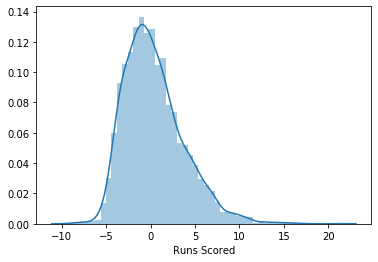

In [269]:
sns.distplot(y_test_reg - nn1_preds)

In [270]:
(y_test_reg - nn1_preds).mean()

0.3856479180928901

In [273]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = nn1_preds

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
nn1_logsvpreds = logs_vs_preds

In [274]:
nn1_logsvpreds.to_csv(r'nn1_logs.csv', index = False)

In [275]:
logs_vs_preds.head()

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,Predicted Home Team Won,Predicted Correct Winner
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,4.456516,4.683026,0,1,0
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,4.897115,4.641427,0,0,1
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,4.364976,4.371426,1,1,1
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,3.387774,4.496938,1,1,1
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,4.481848,3.271171,0,0,1


In [276]:
logs_vs_preds["Predicted Correct Winner"].sum()

1362

In [277]:
logs_vs_preds["Predicted Correct Winner"].mean()

0.5607245780156443

## Deep learning model: 2 layers

In [278]:
nn2 = MLPRegressor(activation = 'identity', hidden_layer_sizes = (15,85))
nn2.fit(pca_data[:,:7],y_train_reg)

nn2_preds = nn2.predict(pca_test_data[:,:7])

In [279]:
np.sqrt(metrics.mean_squared_error(y_test_reg, nn2_preds))

3.37661595410091

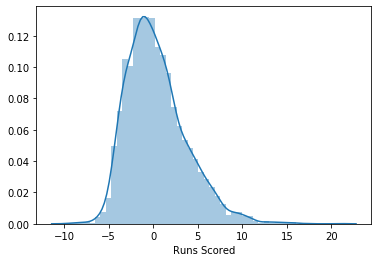

In [280]:
sns.distplot(y_test_reg - nn2_preds)

In [281]:
(y_test_reg-nn2_preds).mean()

0.376875550990838

In [282]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = nn2_preds

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
nn2_logsvpreds = logs_vs_preds

In [283]:
nn2_logsvpreds.to_csv(r'nn2_logs.csv', index = False)

In [284]:
logs_vs_preds.head()

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,Predicted Home Team Won,Predicted Correct Winner
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,4.361388,4.818236,0,1,0
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,4.818640,4.756653,0,0,1
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,4.541502,4.306229,1,0,0
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,3.313642,4.553743,1,1,1
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,4.784116,2.981194,0,0,1


In [285]:
logs_vs_preds["Predicted Correct Winner"].sum()

1365

In [286]:
logs_vs_preds["Predicted Correct Winner"].mean()

0.5619596541786743


## Deep Learning #2: Neural Net with 3 hidden layers

In [287]:
from sklearn.neural_network import MLPRegressor
mlp3 = MLPRegressor(activation = 'identity', hidden_layer_sizes = (20, 10, 110))
mlp3.fit(pca_data[:,:9], y_train_reg)
mlp3_preds = mlp3.predict(pca_test_data[:,:9]) 

In [288]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test_reg, mlp3_preds))

3.3828443066739826

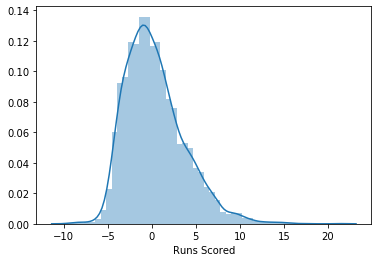

In [289]:
sns.distplot(y_test_reg-mlp3_preds)

In [290]:
(y_test_reg-mlp3_preds).mean() 

0.33410534726590635

In [291]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]
date_team_pitch_pred['Predicted Runs Scored'] = mlp3_preds

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Predicted Runs"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Predicted Runs"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Predicted Runs"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Predicted Runs"]< 
                                  logs_vs_preds["Home Team Predicted Runs"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
nn3_logsvpreds = logs_vs_preds

In [292]:
nn3_logsvpreds.to_csv(r'nn3_logs.csv', index = False)

In [293]:
nn3_logsvpreds["Predicted Correct Winner"].sum()

1333

In [294]:
nn3_logsvpreds["Predicted Correct Winner"].mean()

0.5487855084396871

## K-Nearest Neighbors

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 3275)
knc.fit(pca_data[:,:4], y_train_cl)
knc_preds = knc.predict_proba(pca_test_data[:,:4])

In [370]:
date_team_pitch_pred = teams_concat_test[["date","Opposing Team", "Opposing Starter", "Team"]]

date_team_pitch_pred['Win Probability'] = knc_preds[:,1] # the probabilty at 0 is the P(Y=0)

logs_vs_preds = gl2019[["date", "Home Starting Pitcher","Visiting Starting Pitcher", "Visiting Team", "Home Team", "Visiting Team Runs", "Home Team Runs"]].copy()
logs_vs_preds["Visiting Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Win Probability"] = pd.Series()
logs_vs_preds["Home Team Won"] = (logs_vs_preds["Visiting Team Runs"]< 
                                  logs_vs_preds["Home Team Runs"]).astype(int)

logs_vs_preds["Visiting Team Win Probability"] = logs_vs_preds[["date","Home Team", "Home Starting Pitcher", "Visiting Team"]].apply(get_preds, 1)
logs_vs_preds["Home Team Win Probability"] = logs_vs_preds[["date","Visiting Team", "Visiting Starting Pitcher", "Home Team"]].apply(get_preds, 1)

logs_vs_preds["Predicted Home Team Won"] = (logs_vs_preds["Visiting Team Win Probability"]< 
                                  logs_vs_preds["Home Team Win Probability"]).astype(int)
logs_vs_preds["Predicted Correct Winner"] = (logs_vs_preds["Home Team Won"] == 
                                             logs_vs_preds["Predicted Home Team Won"]).astype(int)
knc_logvpreds = logs_vs_preds

In [371]:
knc_logvpreds.to_csv(r"knc_logs.csv", index = False)

In [372]:
knc_logvpreds["Predicted Correct Winner"].mean()

0.5833676410045286

In [373]:
knc_logvpreds["Predicted Correct Winner"].sum()

1417

## Compare the models to each other

In [2]:
import pandas as pd

### Read in results from each model

In [5]:
coin_logs = pd.read_csv("coin_logs.csv")
dtr1_logs = pd.read_csv("dtr1_logs.csv")
dtr2_logs = pd.read_csv("dtr2_logs.csv")
logistic_logs = pd.read_csv("glm_logs.csv")
linear_logs = pd.read_csv("lm_logs.csv")
forrest_logs = pd.read_csv("rfr_logs.csv")
svm_logs = pd.read_csv("svm2_logs.csv")
bagged_svm_logs = pd.read_csv("svm_bag_logs.csv")
nn1_logs = pd.read_csv("nn1_logs.csv")
nn2_logs = pd.read_csv("nn2_logs.csv")
nn3_logs = pd.read_csv("nn3_logs.csv")
knc_logs = pd.read_csv("knc_logs.csv")

### Create a dictionary of all the models

In [207]:
ests = {"Coin flip":coin_logs, "Overfit Decision Tree":dtr1_logs, "Pruned Decision Tree":dtr2_logs, 
        "Logistic Regression": logistic_logs, "Linear Regression":linear_logs, "Random Forest":forrest_logs,
        "SVM":svm_logs,"Bagged SVMs":bagged_svm_logs, "One Layer Neural Net":nn1_logs, "Two Layer Neural Net": nn2_logs, 
        "Three Layer Neural Net":nn3_logs, "K-Nearest Neighbors":knc_logs} 

In [208]:
for estimator in ests:
  print(estimator +": "+str(round(ests[estimator]["Predicted Correct Winner"].mean()*100,2))+'%\n')

Coin flip: 51.38%

Overfit Decision Tree: 52.45%

Pruned Decision Tree: 55.04%

Logistic Regression: 57.88%

Linear Regression: 58.3%

Random Forest: 54.76%

SVM: 55.33%

Bagged SVMs: 56.73%

One Layer Neural Net: 56.07%

Two Layer Neural Net: 56.2%

Three Layer Neural Net: 54.88%

K-Nearest Neighbors: 58.34%



In [209]:
for estimator in ests:
  print(estimator +": "+str(round(ests[estimator]["Predicted Correct Winner"].sum()))+' correct winner predictions.\n')

Coin flip: 1248 correct winner predictions.

Overfit Decision Tree: 1274 correct winner predictions.

Pruned Decision Tree: 1337 correct winner predictions.

Logistic Regression: 1406 correct winner predictions.

Linear Regression: 1416 correct winner predictions.

Random Forest: 1330 correct winner predictions.

SVM: 1344 correct winner predictions.

Bagged SVMs: 1378 correct winner predictions.

One Layer Neural Net: 1362 correct winner predictions.

Two Layer Neural Net: 1365 correct winner predictions.

Three Layer Neural Net: 1333 correct winner predictions.

K-Nearest Neighbors: 1417 correct winner predictions.



### Define a function to count the number of games in which the models made the same prediction

In [210]:
def compare(est1, est2):
  same_preds = 0
  for i in range(len(est1.index)):
    if est1["Predicted Home Team Won"].iloc[i] == est2["Predicted Home Team Won"].iloc[i]:
      same_preds+=1
  return same_preds

In [211]:
compared_estimators = {}
for est1 in ests:
  compared_estimators[est1] = {}
  for est2 in ests:
    compared_estimators[est1][est2] = compare(ests[est1], ests[est2])

In [212]:
round(pd.DataFrame(compared_estimators)/2429, 2)

,Coin flip,Overfit Decision Tree,Pruned Decision Tree,Logistic Regression,Linear Regression,Random Forest,SVM,Bagged SVMs,One Layer Neural Net,Two Layer Neural Net,Three Layer Neural Net,K-Nearest Neighbors
Coin flip,1.00,0.51,0.50,0.50,0.50,0.50,0.51,0.51,0.50,0.50,0.50,0.50
Overfit Decision Tree,0.51,1.00,0.60,0.59,0.60,0.75,0.59,0.58,0.60,0.61,0.60,0.60
Pruned Decision Tree,0.50,0.60,1.00,0.73,0.79,0.69,0.68,0.70,0.80,0.79,0.81,0.72
Logistic Regression,0.50,0.59,0.73,1.00,0.89,0.71,0.72,0.73,0.80,0.83,0.79,0.81
Linear Regression,0.50,0.60,0.79,0.89,1.00,0.73,0.73,0.75,0.85,0.87,0.82,0.84
Random Forest,0.50,0.75,0.69,0.71,0.73,1.00,0.65,0.66,0.70,0.72,0.70,0.70
SVM,0.51,0.59,0.68,0.72,0.73,0.65,1.00,0.83,0.73,0.75,0.72,0.77
Bagged SVMs,0.51,0.58,0.70,0.73,0.75,0.66,0.83,1.00,0.77,0.78,0.75,0.82
One Layer Neural Net,0.50,0.60,0.80,0.80,0.85,0.70,0.73,0.77,1.00,0.95,0.93,0.81
Two Layer Neural Net,0.50,0.61,0.79,0.83,0.87,0.72,0.75,0.78,0.95,1.00,0.90,0.84


## Many of the estimators have made similar predictions in the the majority of games. What is so similar about these games where most of the estimators predict win or loss?

In [218]:
compare_ests = ests["Linear Regression"][['date','Home Starting Pitcher','Visiting Starting Pitcher', 
                                        'Visiting Team', 'Home Team', 'Visiting Team Runs', 'Home Team Runs', 'Home Team Won']]

In [219]:
compare_ests.head()

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Home Team Won
0,20190320,Michael Fiers,Marco Gonzales,SEA,OAK,9,7,0
1,20190321,Marco Estrada,Yusei Kikuchi,SEA,OAK,5,4,0
2,20190328,Luis Castillo,Jameson Taillon,PIT,CIN,3,5,1
3,20190328,Hyun-Jin Ryu,Zack Greinke,ARI,LAN,5,12,1
4,20190328,Jose Urena,Kyle Freeland,COL,MIA,6,3,0


### Define methods that for each game place the winning team in the winner column, and place the loser in the losing column

In [220]:
import warnings
warnings.simplefilter("ignore")

In [221]:
compare_ests.iloc[0]

date                               20190320
Home Starting Pitcher         Michael Fiers
Visiting Starting Pitcher    Marco Gonzales
Visiting Team                           SEA
Home Team                               OAK
Visiting Team Runs                        9
Home Team Runs                            7
Home Team Won                             0
Name: 0, dtype: object

In [222]:
def winner(game):
  if game[5] < game[6]: # home team scored more runs than the visting team
    return game[4]
  return game[3]

def loser(game):
  if game[5] < game[6]: # home team scored more runs than the visting team
    return game[3]
  return game[4]

In [223]:
compare_ests["Winning Team"] = compare_ests.apply(winner, 1)
compare_ests["Losing Team"] = compare_ests.apply(loser, 1)

## Place starters in winning starter or losing starter

In [224]:
compare_ests.iloc[0]

date                               20190320
Home Starting Pitcher         Michael Fiers
Visiting Starting Pitcher    Marco Gonzales
Visiting Team                           SEA
Home Team                               OAK
Visiting Team Runs                        9
Home Team Runs                            7
Home Team Won                             0
Winning Team                            SEA
Losing Team                             OAK
Name: 0, dtype: object

In [225]:
def winning_starter(game):
  if game[8] == game[3]: # visiting team won
    return game[2]
  return game[1]

def losing_starter(game):
  if game[9] == game[3]: # visiting team lost
    return game[2]
  return game[1]

In [226]:
compare_ests["Winning Starter"] = compare_ests.apply(winning_starter, 1)
compare_ests["Losing Starter"] = compare_ests.apply(losing_starter, 1)

### Drop unneccessary Columns 

In [227]:
compare_ests.drop(["date","Home Starting Pitcher", "Visiting Starting Pitcher", "Visiting Team", 
                   "Visiting Team Runs","Home Team Runs","Home Team"], 1, inplace = True)

In [228]:
compare_ests.head()

,Home Team Won,Winning Team,Losing Team,Winning Starter,Losing Starter
0,0,SEA,OAK,Marco Gonzales,Michael Fiers
1,0,SEA,OAK,Yusei Kikuchi,Marco Estrada
2,1,CIN,PIT,Luis Castillo,Jameson Taillon
3,1,LAN,ARI,Hyun-Jin Ryu,Zack Greinke
4,0,COL,MIA,Kyle Freeland,Jose Urena


## Add Every estimator as a column. If the estimator predicted the outcome of that game correct, the value of that column is 1. 0 else.

In [229]:
compare_ests["Linear Regression Predicted Correct Winner"] = ests["Linear Regression"]["Predicted Correct Winner"]
compare_ests['Overfit Decision Tree Predicted Correct Winner'] = ests["Overfit Decision Tree"]["Predicted Correct Winner"]
compare_ests['Pruned Decision Tree Predicted Correct Winner'] = ests["Pruned Decision Tree"]["Predicted Correct Winner"]
compare_ests['Logistic Regression Predicted Correct Winner'] = ests["Logistic Regression"]["Predicted Correct Winner"]
compare_ests['Random Forest Predicted Correct Winner'] = ests["Random Forest"]["Predicted Correct Winner"]
compare_ests['SVM Predicted Correct Winner'] = ests["SVM"]["Predicted Correct Winner"]
compare_ests['Bagged SVMs Predicted Correct Winner'] = ests["Bagged SVMs"]["Predicted Correct Winner"]
compare_ests['One Layer Neural Net Predicted Correct Winner'] = ests["One Layer Neural Net"]["Predicted Correct Winner"]
compare_ests['Two Layer Neural Net Predicted Correct Winner'] = ests["Two Layer Neural Net"]["Predicted Correct Winner"]
compare_ests['Three Layer Neural Net Predicted Correct Winner'] = ests["Three Layer Neural Net"]["Predicted Correct Winner"]
compare_ests['K-Nearest Neighbors Predicted Correct Winner'] = ests["K-Nearest Neighbors"]["Predicted Correct Winner"]

#### Sum the number of ones in each row. There is a maximum score of an 11, and a minimum of 0

In [230]:
compare_ests["Number of Correct Models"] = compare_ests["Linear Regression Predicted Correct Winner"]+compare_ests['Overfit Decision Tree Predicted Correct Winner']+compare_ests['Pruned Decision Tree Predicted Correct Winner']+compare_ests['Logistic Regression Predicted Correct Winner']+compare_ests['Random Forest Predicted Correct Winner']+compare_ests['SVM Predicted Correct Winner']+compare_ests['Bagged SVMs Predicted Correct Winner']+compare_ests['One Layer Neural Net Predicted Correct Winner']+compare_ests['Two Layer Neural Net Predicted Correct Winner']+compare_ests['Three Layer Neural Net Predicted Correct Winner']+compare_ests['K-Nearest Neighbors Predicted Correct Winner']

In [231]:
compare_ests.head()

,Home Team Won,Winning Team,Losing Team,Winning Starter,Losing Starter,Linear Regression Predicted Correct Winner,Overfit Decision Tree Predicted Correct Winner,Pruned Decision Tree Predicted Correct Winner,Logistic Regression Predicted Correct Winner,Random Forest Predicted Correct Winner,SVM Predicted Correct Winner,Bagged SVMs Predicted Correct Winner,One Layer Neural Net Predicted Correct Winner,Two Layer Neural Net Predicted Correct Winner,Three Layer Neural Net Predicted Correct Winner,K-Nearest Neighbors Predicted Correct Winner,Number of Correct Models
0,0,SEA,OAK,Marco Gonzales,Michael Fiers,0,1,1,0,1,1,0,0,0,0,0,4
1,0,SEA,OAK,Yusei Kikuchi,Marco Estrada,0,1,1,0,1,1,1,1,1,1,0,8
2,1,CIN,PIT,Luis Castillo,Jameson Taillon,0,0,0,0,0,0,0,1,0,0,1,2
3,1,LAN,ARI,Hyun-Jin Ryu,Zack Greinke,1,1,1,1,1,1,1,1,1,1,1,11
4,0,COL,MIA,Kyle Freeland,Jose Urena,1,0,1,1,0,1,1,1,1,1,1,9


### For both the winning and the losing team: Add 2 bullpen stats, 2 starter stats, and 2 offensive stats

In [232]:
# bullpen stats

compare_ests = compare_ests.join(other = pitching2018[["ERA","HR/9"]], on = "Winning Team", how = "left")

compare_ests.rename({"ERA":"Winning Bullpen ERA","HR/9":"Winning Bullpen HR/9"}, axis = 1, inplace = True)

compare_ests = compare_ests.join(other = pitching2018[["ERA","HR/9"]], on = "Losing Team", how = "left")

compare_ests.rename({"ERA":"Losing Bullpen ERA","HR/9":"Losing Bullpen HR/9"}, axis = 1, inplace = True)

# batting stats

compare_ests = compare_ests.join(other = batting2018[['RBI','R/G']], on = 'Winning Team', how = 'left')

compare_ests.rename({"RBI":"Winning RBI", "R/G":"Winning R/G"}, axis = 1, inplace = True)

compare_ests = compare_ests.join(other = batting2018[['RBI','R/G']], on = 'Losing Team', how = 'left')

compare_ests.rename({"RBI":"Losing RBI", "R/G":"Losing R/G"}, axis = 1, inplace = True)

# starting pitcher stats

compare_ests = compare_ests.join(other = starters2018[["ERA","HR/9"]], on = "Winning Starter", how ='left')

compare_ests.rename({"ERA":"Winning Starter ERA","HR/9":"Winning Starter HR/9"},axis = 1, inplace = True)

compare_ests = compare_ests.join(other = starters2018[["ERA","HR/9"]], on = 'Losing Starter', how ='left')

compare_ests.rename({"ERA":"Losing Starter ERA","HR/9":"Losing Starter HR/9"},axis = 1, inplace = True)

In [233]:
compare_ests.head()

,Home Team Won,Winning Team,Losing Team,Winning Starter,Losing Starter,Linear Regression Predicted Correct Winner,Overfit Decision Tree Predicted Correct Winner,Pruned Decision Tree Predicted Correct Winner,Logistic Regression Predicted Correct Winner,Random Forest Predicted Correct Winner,...,Losing Bullpen ERA,Losing Bullpen HR/9,Winning RBI,Winning R/G,Losing RBI,Losing R/G,Winning Starter ERA,Winning Starter HR/9,Losing Starter ERA,Losing Starter HR/9
0,0,SEA,OAK,Marco Gonzales,Michael Fiers,0,1,1,0,1,...,3.37,1.05,644,4.18,778,5.02,4.00,0.92,NaN,NaN
1,0,SEA,OAK,Yusei Kikuchi,Marco Estrada,0,1,1,0,1,...,3.37,1.05,644,4.18,778,5.02,NaN,NaN,5.64,1.82
2,1,CIN,PIT,Luis Castillo,Jameson Taillon,0,0,0,0,0,...,4.03,0.94,665,4.30,665,4.30,4.30,1.49,3.20,0.94
3,1,LAN,ARI,Hyun-Jin Ryu,Zack Greinke,1,1,1,1,1,...,3.56,1.00,756,4.93,658,4.28,1.97,0.98,3.21,1.21
4,0,COL,MIA,Kyle Freeland,Jose Urena,1,0,1,1,0,...,5.34,1.13,748,4.79,554,3.66,2.85,0.76,3.98,0.98


In [234]:
compare_ests[compare_ests.isnull().any(axis = 1)==False]["Number of Correct Models"].mean()

6.196808510638298

In [235]:
compare_ests[compare_ests.isnull().any(axis = 1)==False]["Number of Correct Models"].count()

1692

In [236]:
compare_ests[compare_ests.isnull().any(axis = 1)]["Number of Correct Models"].mean()

6.074626865671642

In [237]:
compare_ests[compare_ests.isnull().any(axis = 1)]["Number of Correct Models"].count()

737

### Reduce the compare data frame; drop games with null values for the starting pitchers, and drop unneccessary columns

In [238]:
reduced_compare = compare_ests.drop(['Winning Team', 'Losing Team', 'Winning Starter', 'Losing Starter',
       'Linear Regression Predicted Correct Winner',
       'Overfit Decision Tree Predicted Correct Winner',
       'Pruned Decision Tree Predicted Correct Winner',
       'Logistic Regression Predicted Correct Winner',
       'Random Forest Predicted Correct Winner',
       'SVM Predicted Correct Winner', 'Bagged SVMs Predicted Correct Winner',
       'One Layer Neural Net Predicted Correct Winner',
       'Two Layer Neural Net Predicted Correct Winner',
       'Three Layer Neural Net Predicted Correct Winner',
       'K-Nearest Neighbors Predicted Correct Winner'], 1).dropna()
reduced_compare.head()

,Home Team Won,Number of Correct Models,Winning Bullpen ERA,Winning Bullpen HR/9,Losing Bullpen ERA,Losing Bullpen HR/9,Winning RBI,Winning R/G,Losing RBI,Losing R/G,Winning Starter ERA,Winning Starter HR/9,Losing Starter ERA,Losing Starter HR/9
2,1,2,4.14,1.15,4.03,0.94,665,4.30,665,4.30,4.30,1.49,3.20,0.94
3,1,11,3.72,1.16,3.56,1.00,756,4.93,658,4.28,1.97,0.98,3.21,1.21
4,0,9,4.62,1.06,5.34,1.13,748,4.79,554,3.66,2.85,0.76,3.98,0.98
5,1,8,3.47,0.98,4.38,0.95,711,4.63,725,4.69,3.50,0.84,2.83,0.72
6,1,5,4.19,1.06,4.15,0.84,653,4.18,717,4.69,2.37,0.72,3.94,1.33


In [239]:
x_labels = labels = list(compare_ests["Number of Correct Models"].value_counts().sort_index())
x_labels

[270, 204, 189, 144, 113, 120, 109, 140, 166, 253, 274, 447]

## Visualize the value counts for correct predictions

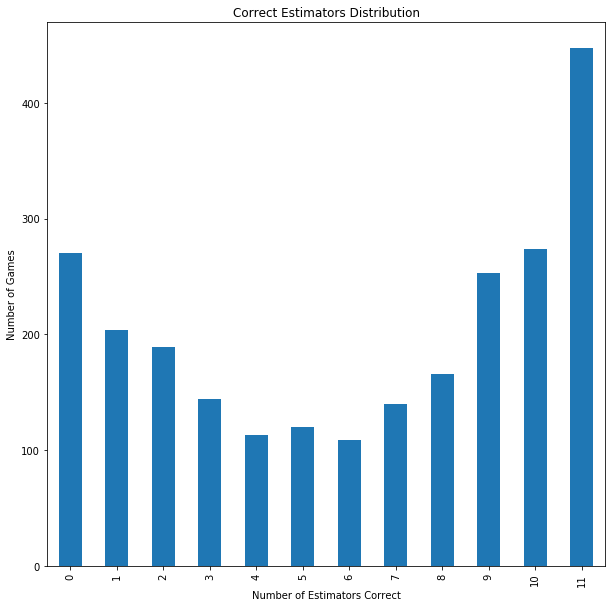

In [250]:
plt.figure(figsize=(10,10))
ax = compare_ests["Number of Correct Models"].value_counts().sort_index().plot(kind = 'bar')
ax.set(xlabel="Number of Estimators Correct", ylabel="Number of Games", title = "Correct Estimators Distribution")
plt.savefig("Correct Estimators Distribution")

## What do games that were easy to predict look like?

In [241]:
len(reduced_compare[reduced_compare["Number of Correct Models"]==11].index)

336

In [259]:
round(reduced_compare[reduced_compare["Number of Correct Models"]==11].mean(),4)#.to_csv(r"11 correct models.csv")

Home Team Won                 0.5030
Number of Correct Models     11.0000
Winning Bullpen ERA           3.8366
Winning Bullpen HR/9          1.0625
Losing Bullpen ERA            4.4135
Losing Bullpen HR/9           1.1122
Winning RBI                 741.4405
Winning R/G                   4.8029
Losing RBI                  635.5625
Losing R/G                    4.1143
Winning Starter ERA           3.4061
Winning Starter HR/9          0.9774
Losing Starter ERA            5.4497
Losing Starter HR/9           1.4176
dtype: float64

## How about games that were super hard to predict?

In [254]:
len(reduced_compare[reduced_compare["Number of Correct Models"]==0].index)

198

In [260]:
round(reduced_compare[reduced_compare["Number of Correct Models"]==0].mean(),4)#.to_csv(r"0 correct models.csv")

Home Team Won                 0.5909
Number of Correct Models      0.0000
Winning Bullpen ERA           4.3792
Winning Bullpen HR/9          1.1389
Losing Bullpen ERA            3.8258
Losing Bullpen HR/9           1.0588
Winning RBI                 651.8182
Winning R/G                   4.2137
Losing RBI                  735.8030
Losing R/G                    4.7666
Winning Starter ERA           5.3966
Winning Starter HR/9          1.4217
Losing Starter ERA            3.2977
Losing Starter HR/9           0.9899
dtype: float64

## What about games that were right in the middle?

In [256]:
len(reduced_compare[(reduced_compare["Number of Correct Models"]>3) & (reduced_compare["Number of Correct Models"]<8)].index)

322

In [261]:
round(reduced_compare[(reduced_compare["Number of Correct Models"]>3) & (reduced_compare["Number of Correct Models"]<8)].mean(),4)#.to_csv(r"medium correct models.csv")

Home Team Won                 0.6087
Number of Correct Models      5.5839
Winning Bullpen ERA           3.9869
Winning Bullpen HR/9          1.0630
Losing Bullpen ERA            4.1344
Losing Bullpen HR/9           1.0737
Winning RBI                 705.7453
Winning R/G                   4.5730
Losing RBI                  692.4689
Losing R/G                    4.4907
Winning Starter ERA           3.9479
Winning Starter HR/9          1.1440
Losing Starter ERA            3.9022
Losing Starter HR/9           1.0712
dtype: float64

In [264]:
ests["Linear Regression"]

date                                                                  49043109884
Home Starting Pitcher           Michael FiersMarco EstradaLuis CastilloHyun-Ji...
Visiting Starting Pitcher       Marco GonzalesYusei KikuchiJameson TaillonZack...
Visiting Team                   SEASEAPITARICOLSLNATLSFNNYNCHACLEBALANABOSHOUC...
Home Team                       OAKOAKCINLANMIAMILPHISDNWASKCAMINNYAOAKSEATBAT...
Visiting Team Runs                                                          11748
Home Team Runs                                                              11719
Visiting Team Predicted Runs                                              10549.5
Home Team Predicted Runs                                                    10941
Home Team Won                                                                1286
Predicted Home Team Won                                                      1341
Predicted Correct Winner                                                     1416
dtype: object

In [59]:
lin_preds = pd.concat([linear_logs["Visiting Team Predicted Runs"],linear_logs["Home Team Predicted Runs"]])
logs = pd.concat([gl2019["Visiting Team Runs"],gl2019["Home Team Runs"]])
logs_vs_preds_box = pd.concat([lin_preds, logs],axis = 1)
logs_vs_preds_box.rename({1:"True Runs", 0:"Linear Regression Predicted Runs"},axis = 1, inplace = True)

In [62]:
lin_preds.describe()

count    4858.000000
mean        4.423743
std         0.943472
min         1.364247
25%         3.829312
50%         4.342976
75%         4.880207
max        11.273214
dtype: float64

In [64]:
logs.describe()

count    4858.000000
mean        4.830589
std         3.322411
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        23.000000
dtype: float64

In [57]:
pd.melt(logs_vs_preds_box)

,variable,value
0,Linear Regression Predicted Runs,3.800213
1,Linear Regression Predicted Runs,4.549488
2,Linear Regression Predicted Runs,4.297899
3,Linear Regression Predicted Runs,2.879216
4,Linear Regression Predicted Runs,5.113562
...,...,...
9711,True Runs,5.000000
9712,True Runs,5.000000
9713,True Runs,3.000000
9714,True Runs,6.000000


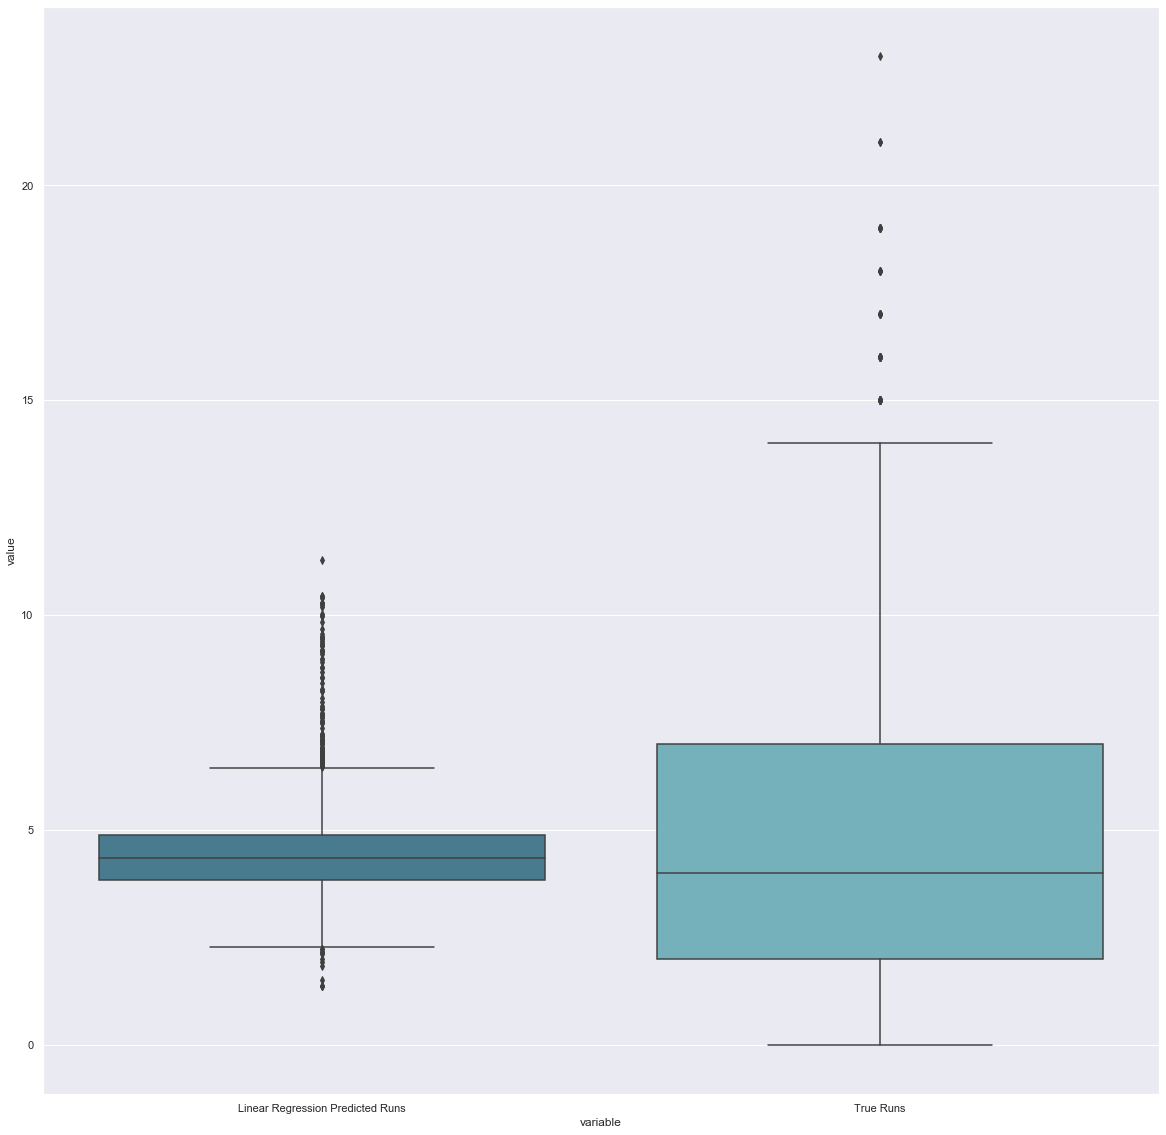

In [68]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
sns.boxplot(x = "variable", y = "value", data = pd.melt(logs_vs_preds_box), palette="GnBu_d")
plt.savefig("Linear regression preds versus true runs box plot")

In [71]:
lin_preds = pd.concat([nn3_logs["Visiting Team Predicted Runs"],nn3_logs["Home Team Predicted Runs"]])
logs = pd.concat([gl2019["Visiting Team Runs"],gl2019["Home Team Runs"]])
logs_vs_preds_box = pd.concat([lin_preds, logs],axis = 1)
logs_vs_preds_box.rename({1:"True Runs", 0:"3 Layer Neural Network Predicted Runs"},axis = 1, inplace = True)

## Analysis of Largest Linear Regression Predictions

In [94]:
lin_lysis = linear_logs.copy()

In [95]:
lin_lysis['max runs'] = lin_lysis.apply(lambda game: max(game[8],game[7]), 1)

In [96]:
lin_lysis = lin_lysis.sort_values('max runs', ascending = False)

In [97]:
lin_lysis.head()

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,Predicted Home Team Won,Predicted Correct Winner,max runs
1029,20190614,Luis Ortiz,Eduardo Rodriguez,BOS,BAL,13,2,11.273214,3.630997,0,0,1,11.273214
2407,20190928,Jhoulys Chacin,John Means,BAL,BOS,9,4,3.290031,10.451327,0,1,0,10.451327
224,20190414,David Price,John Means,BAL,BOS,0,4,3.331377,10.451327,1,1,1,10.451327
1794,20190813,Domingo German,John Means,BAL,NYA,3,8,4.219348,10.404567,1,1,1,10.404567
511,20190506,John Means,Josh Smith,BOS,BAL,1,4,10.275744,3.878578,1,0,0,10.275744


In [98]:
# bullpen stats

lin_lysis = lin_lysis.join(other = pitching2018[["ERA","HR/9"]], on = "Home Team", how = "left")

lin_lysis.rename({"ERA":"Home Bullpen ERA","HR/9":"Home Bullpen HR/9"}, axis = 1, inplace = True)

lin_lysis = lin_lysis.join(other = pitching2018[["ERA","HR/9"]], on = "Visiting Team", how = "left")

lin_lysis.rename({"ERA":"Visiting Bullpen ERA","HR/9":"Visiting Bullpen HR/9"}, axis = 1, inplace = True)

# batting stats

lin_lysis = lin_lysis.join(other = batting2018[['RBI','R/G']], on = 'Home Team', how = 'left')

lin_lysis.rename({"RBI":"Home RBI", "R/G":"Home R/G"}, axis = 1, inplace = True)

lin_lysis = lin_lysis.join(other = batting2018[['RBI','R/G']], on = 'Visiting Team', how = 'left')

lin_lysis.rename({"RBI":"Visiting RBI", "R/G":"Visiting R/G"}, axis = 1, inplace = True)

# starting pitcher stats

lin_lysis = lin_lysis.join(other = starters2018[["ERA","HR/9"]], on = "Home Starting Pitcher", how ='left')

lin_lysis.rename({"ERA":"Home Starter ERA","HR/9":"Home Starter HR/9"},axis = 1, inplace = True)

lin_lysis = lin_lysis.join(other = starters2018[["ERA","HR/9"]], on = 'Visiting Starting Pitcher', how ='left')

lin_lysis.rename({"ERA":"Visiting Starter ERA","HR/9":"Visiting Starter HR/9"},axis = 1, inplace = True)

In [130]:
lin_lysis.head(20)

,date,Home Starting Pitcher,Visiting Starting Pitcher,Visiting Team,Home Team,Visiting Team Runs,Home Team Runs,Visiting Team Predicted Runs,Home Team Predicted Runs,Home Team Won,...,Visiting Bullpen ERA,Visiting Bullpen HR/9,Home RBI,Home R/G,Visiting RBI,Visiting R/G,Home Starter ERA,Home Starter HR/9,Visiting Starter ERA,Visiting Starter HR/9
1029,20190614,Luis Ortiz,Eduardo Rodriguez,BOS,BAL,13,2,11.273214,3.630997,0,...,3.72,0.98,593,3.84,829,5.41,15.43,0.00,3.82,1.11
2407,20190928,Jhoulys Chacin,John Means,BAL,BOS,9,4,3.290031,10.451327,0,...,4.78,1.13,829,5.41,593,3.84,3.50,0.84,13.50,2.70
224,20190414,David Price,John Means,BAL,BOS,0,4,3.331377,10.451327,1,...,4.78,1.13,829,5.41,593,3.84,3.58,1.28,13.50,2.70
1794,20190813,Domingo German,John Means,BAL,NYA,3,8,4.219348,10.404567,1,...,4.78,1.13,821,5.25,593,3.84,5.57,1.58,13.50,2.70
511,20190506,John Means,Josh Smith,BOS,BAL,1,4,10.275744,3.878578,1,...,3.72,0.98,593,3.84,829,5.41,13.50,2.70,NaN,NaN
1452,20190719,John Means,David Price,BOS,BAL,2,11,10.275744,3.506959,1,...,3.72,0.98,593,3.84,829,5.41,13.50,2.70,3.58,1.28
1059,20190616,John Means,Brian Johnson,BOS,BAL,8,6,10.275744,3.811885,0,...,3.72,0.98,593,3.84,829,5.41,13.50,2.70,4.17,1.45
1710,20190807,John Means,James Paxton,NYA,BAL,14,2,10.228984,3.459479,0,...,3.38,1.01,593,3.84,821,5.25,13.50,2.70,3.76,1.29
670,20190518,Adam Plutko,John Means,BAL,CLE,1,4,4.573645,10.199992,1,...,4.78,1.13,786,5.05,593,3.84,5.28,2.47,13.50,2.70
1219,20190628,John Means,Mike Clevinger,CLE,BAL,0,13,10.024409,3.581206,1,...,4.60,1.51,593,3.84,786,5.05,13.50,2.70,3.02,0.95


In [131]:
lin_lysis.drop(['date', 'Home Starting Pitcher', 'Visiting Starting Pitcher',
       'Visiting Team', 'Home Team'],1, inplace = True)

In [132]:
lin_lysis.iloc[0]

Visiting Team Runs               13.000000
Home Team Runs                    2.000000
Visiting Team Predicted Runs     11.273214
Home Team Predicted Runs          3.630997
Home Team Won                     0.000000
Predicted Home Team Won           0.000000
Predicted Correct Winner          1.000000
max runs                         11.273214
Home Bullpen ERA                  4.780000
Home Bullpen HR/9                 1.130000
Visiting Bullpen ERA              3.720000
Visiting Bullpen HR/9             0.980000
Home RBI                        593.000000
Home R/G                          3.840000
Visiting RBI                    829.000000
Visiting R/G                      5.410000
Home Starter ERA                 15.430000
Home Starter HR/9                 0.000000
Visiting Starter ERA              3.820000
Visiting Starter HR/9             1.110000
Name: 1029, dtype: float64

In [133]:
batting2018['RBI'].mean()

686.8666666666667

In [134]:
batting2018['R/G'].mean()

4.449666666666666

In [135]:
lin_lysis.iloc[0,[0,2,8,9,14,15,16,17]]

Visiting Team Runs               13.000000
Visiting Team Predicted Runs     11.273214
Home Bullpen ERA                  4.780000
Home Bullpen HR/9                 1.130000
Visiting RBI                    829.000000
Visiting R/G                      5.410000
Home Starter ERA                 15.430000
Home Starter HR/9                 0.000000
Name: 1029, dtype: float64